In [36]:
#Databearbetning
import pandas as pd
import numpy as np


#Visualisering
import matplotlib.pyplot as plt
import seaborn as sns


#Datauppdelning
from sklearn.model_selection import train_test_split


#ML-modeller
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor


#Modellutvärdering och validering
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate


Inläsning av lämpliga bibliotek är klar. Saknas något får vi lägga till det längs vägen.
Nästa steg är inläsning av data och EDA.

In [2]:
#laddar in datasetet
# #df = pd.read_csv("car_price_dataset.csv")   Detta fungerade inte eftersom filen inte är kommaseparerad. Justerar separator till ;


df_raw = pd.read_csv("car_price_dataset.csv", sep=";")    #original
df = df_raw.copy()    # arbetskopia 



df.head()

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867


In [3]:
df.isnull().sum()


Brand           0
Model           0
Year            0
Engine_Size     0
Fuel_Type       0
Transmission    0
Mileage         0
Doors           0
Owner_Count     0
Price           0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         10000 non-null  object 
 1   Model         10000 non-null  object 
 2   Year          10000 non-null  int64  
 3   Engine_Size   10000 non-null  float64
 4   Fuel_Type     10000 non-null  object 
 5   Transmission  10000 non-null  object 
 6   Mileage       10000 non-null  int64  
 7   Doors         10000 non-null  int64  
 8   Owner_Count   10000 non-null  int64  
 9   Price         10000 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 781.4+ KB


In [5]:
df.describe()

,Year,Engine_Size,Mileage,Doors,Owner_Count,Price
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,2011.543700,3.000560,149239.111800,3.497100,2.991100,8852.96440
std,6.897699,1.149324,86322.348957,1.110097,1.422682,3112.59681
min,2000.000000,1.000000,25.000000,2.000000,1.000000,2000.00000
25%,2006.000000,2.000000,74649.250000,3.000000,2.000000,6646.00000
50%,2012.000000,3.000000,149587.000000,3.000000,3.000000,8858.50000
75%,2017.000000,4.000000,223577.500000,4.000000,4.000000,11086.50000
max,2023.000000,5.000000,299947.000000,5.000000,5.000000,18301.00000


Efter att ha analyserat bl a datatyper och förekomst av nullvärden kan vi konstatera att datasetet inte innehåller några tomma värden
Datasetet består av numeriska och kategoriska variabler och omfattar data relaterat till 10 000 bilar.



<Axes: title={'center': 'Antal per bilmärke'}, xlabel='Märke', ylabel='Antal'>

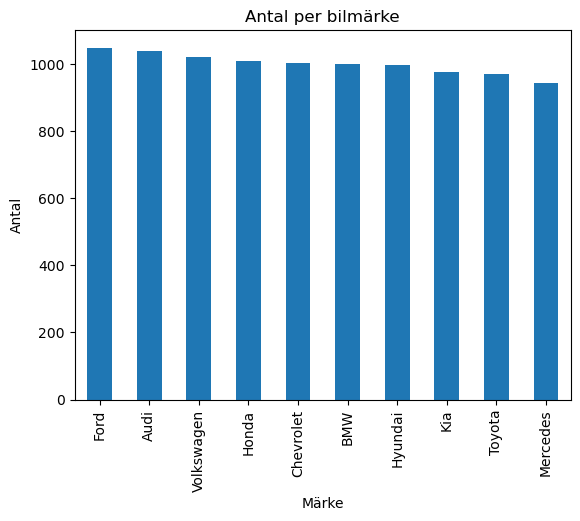

In [6]:
#df["Brand"].value_counts().plot(kind="bar")  samma kod som nedan men utan rubriker

#Vi får fram ett stapeldiagram med antal bilar per märke och ser hur dessa fördelar sig.

df["Brand"].value_counts().plot(
    kind="bar",
    title="Antal per bilmärke",
    xlabel="Märke",
    ylabel="Antal"
)

In [7]:
#Antal unika värden per kolumn i datasetet, kardinalitet.

df.nunique()

Brand             10
Model             30
Year              24
Engine_Size       41
Fuel_Type          4
Transmission       3
Mileage         9854
Doors              4
Owner_Count        5
Price           6661
dtype: int64

<Axes: ylabel='Model'>

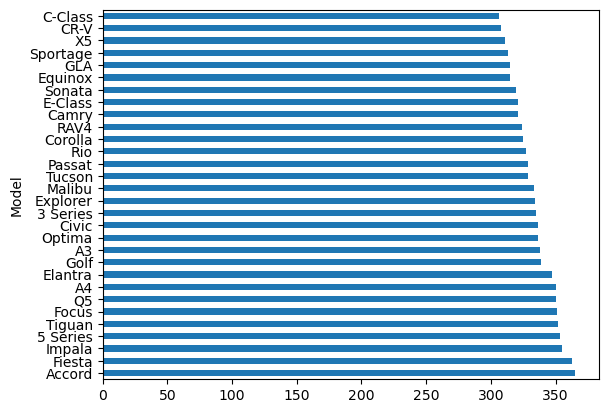

In [8]:
#Skapar ett stapeldiagram som visar frekvensfördelning för varje bilmodell

df["Model"].value_counts().plot(kind="barh")

<Axes: title={'center': 'Antal per bränsletyp'}, xlabel='Bränsletyp', ylabel='Antal'>

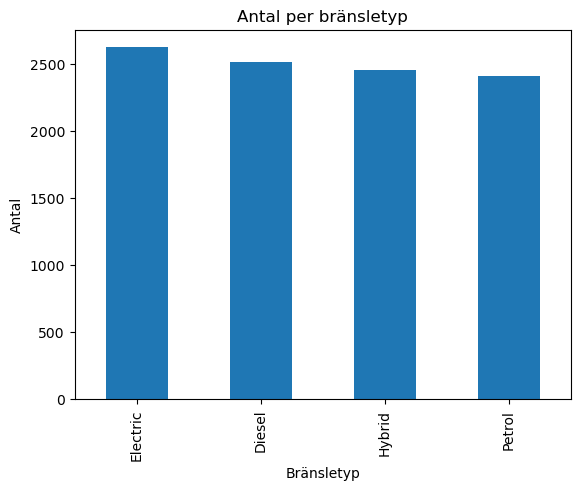

In [9]:
#Stapeldiagram över fördelningan av bilar per bränsletyp

df["Fuel_Type"].value_counts().plot(
    kind="bar",
    title="Antal per bränsletyp",
    xlabel="Bränsletyp",
    ylabel="Antal"
)

<Axes: title={'center': 'Typ av växellåda'}, xlabel='Växellåda', ylabel='Antal'>

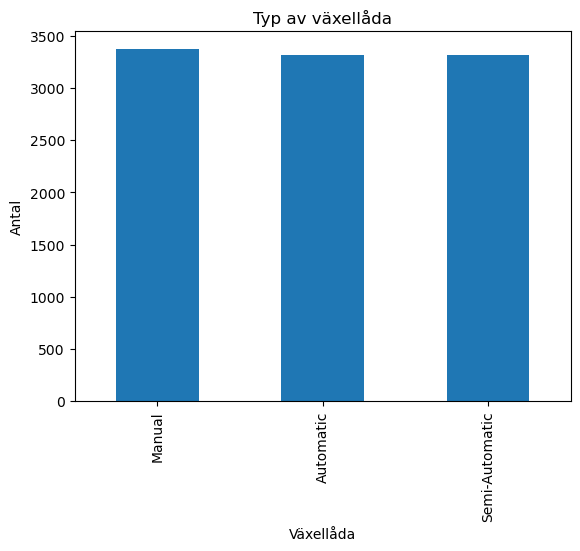

In [10]:
#Fördelning av bilar per växellåda

df["Transmission"].value_counts().plot(
    kind="bar",
    title="Typ av växellåda",
    xlabel="Växellåda",
    ylabel="Antal"
)

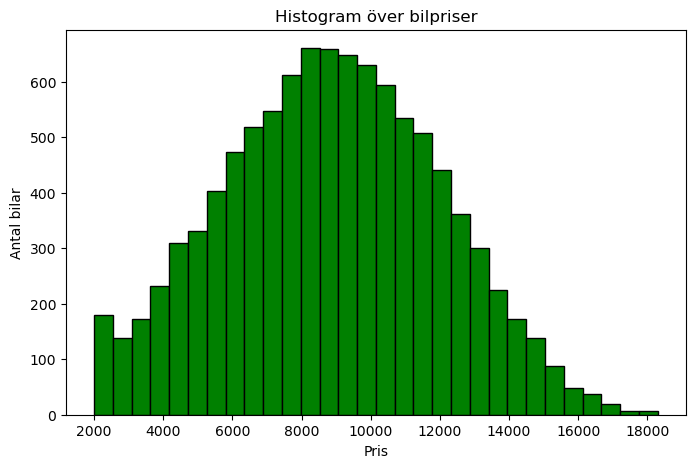

In [11]:
#Skapar ett histogram på visar priser för att se fördelningen och antyda eventuella outliers eller ojämnheter i datasetet

plt.figure(figsize=(8,5))
plt.hist(df['Price'], bins=30, color='green', edgecolor='black')
plt.title("Histogram över bilpriser")
plt.xlabel("Pris")
plt.ylabel("Antal bilar")
plt.show()

Vi kan se att det finns enstaka outliers vad gåller de högaste priserna. Detta tar vi hänsyn till i kommande analyser.

Nästa steg är att dela in datan i X (träningsdata) och y (testdata)

In [12]:
# Features (alla kolumner utom Price)
X = df.drop(columns=["Price"])

# Target (som vi vill prediktera)
y = df["Price"]

# Snabb kontroll så att det stämmer
X.shape, y.shape


((10000, 9), (10000,))

In [13]:
#from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    random_state=42  #lätt att återskapa med samma random_state
)

X_train.shape, X_test.shape


((8000, 9), (2000, 9))

Datan har delats upp i träningsdata på 80 % och testdata på 20 %.
Träningsdatan tränar modellen medan testdatan utvärderar prestandan på tidigare osedd data.

In [14]:
numeric_features = X_train.select_dtypes(include=["int64", "float64"]).columns
categorical_features = X_train.select_dtypes(include=["object"]).columns

numeric_features, categorical_features
#identifierar numreriska kolumner och kategoriska kolumner på X-träningsdatan


(Index(['Year', 'Engine_Size', 'Mileage', 'Doors', 'Owner_Count'], dtype='object'),
 Index(['Brand', 'Model', 'Fuel_Type', 'Transmission'], dtype='object'))

In [15]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer


numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),   #Numeriska saknade värden ersätts med median, är robust mot outliers, stabilt i produktion och bra för prisdata
    ("scaler", StandardScaler())
])



categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),    #kategoriska saknade värden ersätts med det vanligaste värdet i kolumnen, t ex Fuel_Type vid NaN-värden.
    ("onehot", OneHotEncoder(handle_unknown="ignore"))       #nya/okända kategorier ignoreras. Modellen kraschar inte och prediktionen fungerar ändå
])



preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

#Kategoriska variabler omvandlades till numeriska med One-Hot Encoding. 
#Preprocessing implementerades i en pipeline tillsammans med imputering och skalning för att säkerställa korrekt hantering vid korsvalidering och modellträning.

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score   #returnerar mått (t ex RMSE) för jämförelser. Ungefär samma som cross_validate (som visar fler mått och tider samtidigt)
from sklearn.pipeline import Pipeline




För en enkel baseline-modell används 5-faldig korsvalidering med cross_val_score. För modeller med hyperparametrar används GridSearchCV, som genomför korsvalidering och modellval automatiskt.

In [17]:
linreg_pipe = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", LinearRegression())
])


In [18]:
# Korsvalidering körs ENDAST på träningsdata (X_train, y_train).
# Testdata (X_test, y_test) används inte här.

cv_scores = cross_val_score(
    linreg_pipe,
    X_train,
    y_train,
    cv=5,
    scoring="neg_root_mean_squared_error",
    n_jobs=-1,
    error_score="raise"
)

# Gör om till positiva RMSE-värden
cv_rmse = -cv_scores

print("Linear Regression CV RMSE (mean):", cv_rmse.mean())
print("Linear Regression CV RMSE (std):", cv_rmse.std())

# Träna nu modellen på hela träningsdatan (inför test-utvärdering)
linreg_pipe.fit(X_train, y_train)


#OBS! RMSE skrivs ut men visualiseringen av flödets steg går inte att se i Github utan att klicka på någon länk. Göra om den eller ta bort?




Linear Regression CV RMSE (mean): 89.06271055965048
Linear Regression CV RMSE (std): 16.838777417569727


,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


Modellen tränas 5 gånger, preprocessing körs alltid på rätt sätt innan och RMSE beräknas

In [19]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Testdata används ENDAST här (slutlig utvärdering)
y_pred = linreg_pipe.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Linear Regression Test RMSE:", test_rmse)



Linear Regression Test RMSE: 64.9147498869657


In [20]:

relative_error = cv_rmse.mean() / y_train.mean()
print("Relativt fel:", relative_error)


Relativt fel: 0.010087810672717109


Ridge Regression är en regulariserad variant av linjär regression där en straffterm läggs till för att minska risken för överanpassning.
Den är ett bra nästa steg när man har många features.

In [21]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline


In [22]:
ridge_pipe = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", Ridge())
])


In [23]:
# GridSearchCV kör korsvalidering ENDAST på träningsdata.
# Testdata används inte här.

param_grid_ridge = {
    "model__alpha": [0.01, 0.1, 1, 10, 50, 100]
}

gs_ridge = GridSearchCV(
    ridge_pipe,
    param_grid=param_grid_ridge,
    cv=5,
    scoring="neg_root_mean_squared_error",
    n_jobs=-1,
    error_score="raise"
)

gs_ridge.fit(X_train, y_train)

print("Ridge best params:", gs_ridge.best_params_)
print("Ridge CV RMSE:", -gs_ridge.best_score_)




for mean, std, alpha in zip(
    -gs_ridge.cv_results_["mean_test_score"],
    gs_ridge.cv_results_["std_test_score"],
    gs_ridge.cv_results_["param_model__alpha"]
):
    print(f"alpha={alpha}: RMSE={mean:.2f}, std={std:.2f}")



Ridge best params: {'model__alpha': 0.01}
Ridge CV RMSE: 89.0606128066141
alpha=0.01: RMSE=89.06, std=16.84
alpha=0.1: RMSE=89.06, std=16.84
alpha=1.0: RMSE=89.07, std=16.79
alpha=10.0: RMSE=89.49, std=16.20
alpha=50.0: RMSE=97.05, std=12.77
alpha=100.0: RMSE=115.79, std=8.29


In [24]:
#Kollar antal outliers och i % på price



Q1 = df["Price"].quantile(0.25)
Q3 = df["Price"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_price = df[
    (df["Price"] < lower_bound) | (df["Price"] > upper_bound)
]

print("Antal outliers i Price:", len(outliers_price))


print("Andel outliers (%):", len(outliers_price) / len(df) * 100)


Antal outliers i Price: 6
Andel outliers (%): 0.06


In [25]:
#Kontrollerar antal outliers i Mileage

Q1 = df["Mileage"].quantile(0.25)
Q3 = df["Mileage"].quantile(0.75)
IQR = Q3 - Q1

lb = Q1 - 1.5 * IQR
ub = Q3 + 1.5 * IQR

outliers_mileage = df[(df["Mileage"] < lb) | (df["Mileage"] > ub)]
print("Antal outliers i Mileage:", len(outliers_mileage))


Antal outliers i Mileage: 0


In [26]:
# tar bort outliers i Price innan _Train/Test-split eftersom det är bäst. Originaldatan är fortfarande orörd.

df_no_outliers = df[
    (df["Price"] >= lower_bound) &
    (df["Price"] <= upper_bound)
]

print("Rader före:", len(df))
print("Rader efter:", len(df_no_outliers))


Rader före: 10000
Rader efter: 9994


In [27]:
# skapar ny X och y och delar upp dem på samma sätt som innan med random_state=42. Dett är från datan exklusive outliers

X_no = df_no_outliers.drop(columns="Price")
y_no = df_no_outliers["Price"]


from sklearn.model_selection import train_test_split

X_train_no, X_test_no, y_train_no, y_test_no = train_test_split(
    X_no,
    y_no,
    test_size=0.2,
    random_state=42
)


In [28]:
#Kör samma Linear Regression igen utan outliers

from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

linreg_pipe_no = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", LinearRegression())
])



#cross-validation utan outliers
cv_scores_no = cross_val_score(
    linreg_pipe_no,
    X_train_no,
    y_train_no,
    cv=5,
    scoring="neg_root_mean_squared_error",
    n_jobs=-1
)

cv_rmse_no = -cv_scores_no

print("Linear Regression (no price outliers) CV RMSE (mean):", cv_rmse_no.mean())
print("Linear Regression (no price outliers) CV RMSE (std):", cv_rmse_no.std())



#fit på träningdatan
linreg_pipe_no.fit(X_train_no, y_train_no)




Linear Regression (no price outliers) CV RMSE (mean): 82.32539651644167
Linear Regression (no price outliers) CV RMSE (std): 13.654125032292923


,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


Vi tog bort outliera med IQR-metoden. RMSE förändrades, relaterat till de extrema värdenas påverkan.

Skillnaden mellan linjär regressionsmodell med och utan outliers är:
Linjär med outliers:   RMSE i snitt ~89 och standardavvikelse ~16
Linjär utan outliers:  RMSE i snitt ~82.3 och standardavvikelse ~13.7   

Detta är en förbättrad output! 

Modellen är alltså känslig för outliers och dessa kan tas bort eftersom de påverkar modellen negativt, alternativt sparas för att de speglar även extrema värden/pris i detta fall.

In [29]:
#saker som fattas för att kunna köra Annas kod, RandomForest

import numpy as np

from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor


In [30]:
#Annas kod justerad för att passa min modell
#Del 1


from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

rf_pipe = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", RandomForestRegressor(
        n_estimators=300,
        max_depth=None,
        min_samples_split=10,
        min_samples_leaf=5,
        random_state=42,
        n_jobs=-1
    ))
])


In [31]:
# Del 2. Fortsättning. Cross-validation på endast Train-data

rf_cv_scores = cross_val_score(
    rf_pipe,
    X_train,
    y_train,
    cv=5,
    scoring="neg_root_mean_squared_error",
    n_jobs=-1
)

rf_rmse = -rf_cv_scores

print("Random Forest CV RMSE (mean):", rf_rmse.mean())
print("Random Forest CV RMSE (std):", rf_rmse.std())


Random Forest CV RMSE (mean): 422.96041672462906
Random Forest CV RMSE (std): 15.104611057072649


In [32]:
#Del 3, vänta med denna!!




from sklearn.metrics import mean_squared_error

rf_pipe.fit(X_train, y_train)

y_pred = rf_pipe.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Random Forest Test RMSE:", test_rmse)


Random Forest Test RMSE: 385.379672457382


# Beslutsträd och random forest

In [40]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8000 entries, 9254 to 7270
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         8000 non-null   object 
 1   Model         8000 non-null   object 
 2   Year          8000 non-null   int64  
 3   Engine_Size   8000 non-null   float64
 4   Fuel_Type     8000 non-null   object 
 5   Transmission  8000 non-null   object 
 6   Mileage       8000 non-null   int64  
 7   Doors         8000 non-null   int64  
 8   Owner_Count   8000 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 625.0+ KB


In [41]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 8000 entries, 9254 to 7270
Series name: Price
Non-Null Count  Dtype
--------------  -----
8000 non-null   int64
dtypes: int64(1)
memory usage: 125.0 KB


Testar korrealtionen

In [42]:
train_corr = X_train.copy()
train_corr["Price"] = y_train
train_corr.select_dtypes(include="number").corr()["Price"].sort_values(ascending=False)



Price          1.000000
Year           0.663176
Engine_Size    0.362010
Doors          0.004508
Owner_Count   -0.000079
Mileage       -0.551387
Name: Price, dtype: float64

Beslutsträd

In [43]:
dec_tree = DecisionTreeRegressor(random_state=42)  #Skapar en beslutsmodell

In [44]:
param_grid = {
    "max_depth": [2, 3, 5, 10],
    "min_samples_split": [2, 5, 10]
}


In [47]:
tree_pipe = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", DecisionTreeRegressor(random_state=42))
])

param_grid = {
    "model__max_depth": [None, 3, 5, 10, 20],
    "model__min_samples_split": [2, 5, 10],
    "model__min_samples_leaf": [1, 2, 4]
}

grid = GridSearchCV(
    tree_pipe,
    param_grid=param_grid,
    cv=5,
    scoring="neg_root_mean_squared_error",  # RMSE direkt (neg eftersom sklearn)
    n_jobs=-1
)

grid.fit(X_train, y_train)

grid.best_params_, -grid.best_score_

({'model__max_depth': None,
  'model__min_samples_leaf': 2,
  'model__min_samples_split': 5},
 np.float64(643.8037396533693))

In [48]:
grid.fit(X_train, y_train)

,estimator,Pipeline(step...m_state=42))])
,param_grid,"{'model__max_depth': [None, 3, ...], 'model__min_samples_leaf': [1, 2, ...], 'model__min_samples_split': [2, 5, ...]}"
,scoring,'neg_root_mean_squared_error'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('num', ...), ('cat', ...)]"


In [49]:
y_pred = grid.predict(X_test)

In [50]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [51]:
print("RMSE:", rmse)
print("Bästa parametrar:", grid.best_params_)


RMSE: 581.1947806088286
Bästa parametrar: {'model__max_depth': None, 'model__min_samples_leaf': 2, 'model__min_samples_split': 5}
